In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *

path = untar_data(URLs.CIFAR);
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=24 , bs = 256 )
data.normalize(imagenet_stats) 
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Обучение модели:

In [0]:
learn.fit(4, lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,1.372085,1.188249,0.416400,05:18
1,1.130186,1.079294,0.377200,05:21
2,1.075705,0.966766,0.337000,05:20
3,1.018575,0.939290,0.330200,05:23


Визуализация:

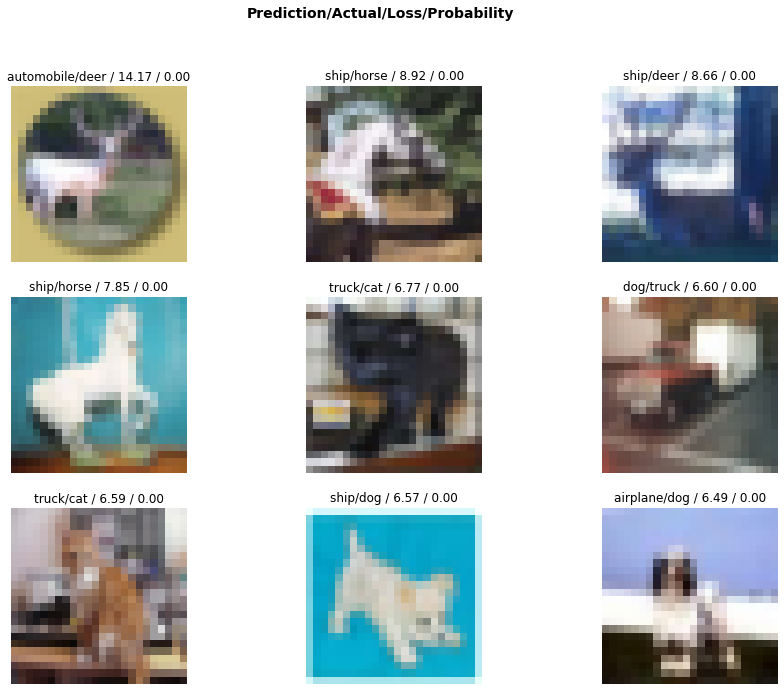

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,11))

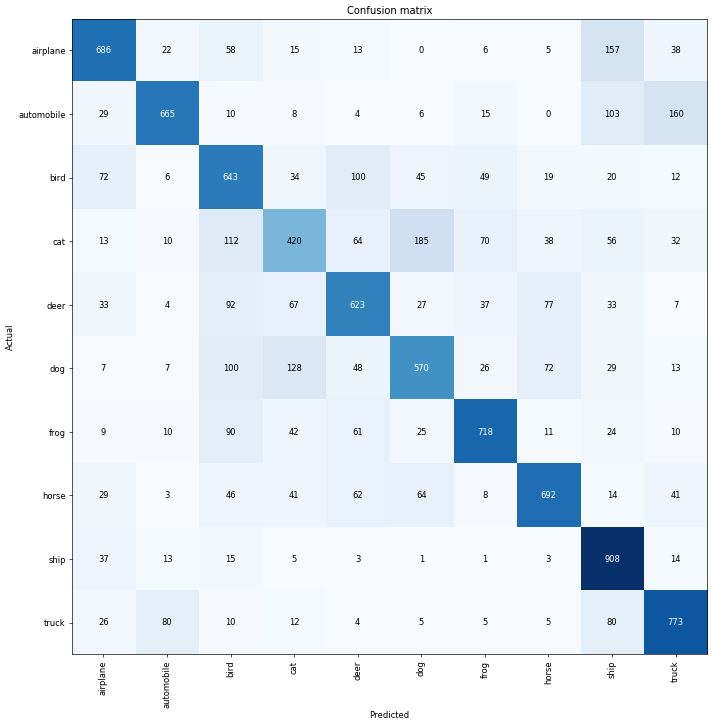

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=30)

[('cat', 'dog', 185),
 ('automobile', 'truck', 160),
 ('airplane', 'ship', 157),
 ('dog', 'cat', 128),
 ('cat', 'bird', 112),
 ('automobile', 'ship', 103),
 ('bird', 'deer', 100),
 ('dog', 'bird', 100),
 ('deer', 'bird', 92),
 ('frog', 'bird', 90),
 ('truck', 'automobile', 80),
 ('truck', 'ship', 80),
 ('deer', 'horse', 77),
 ('bird', 'airplane', 72),
 ('dog', 'horse', 72),
 ('cat', 'frog', 70),
 ('deer', 'cat', 67),
 ('cat', 'deer', 64),
 ('horse', 'dog', 64),
 ('horse', 'deer', 62),
 ('frog', 'deer', 61),
 ('airplane', 'bird', 58),
 ('cat', 'ship', 56),
 ('bird', 'frog', 49),
 ('dog', 'deer', 48),
 ('horse', 'bird', 46),
 ('bird', 'dog', 45),
 ('frog', 'cat', 42),
 ('horse', 'cat', 41),
 ('horse', 'truck', 41),
 ('airplane', 'truck', 38),
 ('cat', 'horse', 38),
 ('deer', 'frog', 37),
 ('ship', 'airplane', 37),
 ('bird', 'cat', 34),
 ('deer', 'airplane', 33),
 ('deer', 'ship', 33),
 ('cat', 'truck', 32)]

Теперь попробуем дообучить модель с помощью 1cycle:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


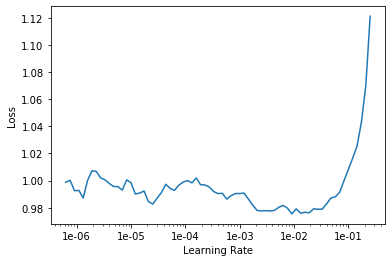

In [0]:
learn.lr_find() # построим зависимость лосс - скорость обучения
learn.recorder.plot() # визуализируем зависимость

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2)) # выполняем 1cycle в заданном диапазоне lr

epoch,train_loss,valid_loss,error_rate,time
0,0.938683,0.824328,0.287900,09:08
1,0.844904,0.777034,0.273400,09:11


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

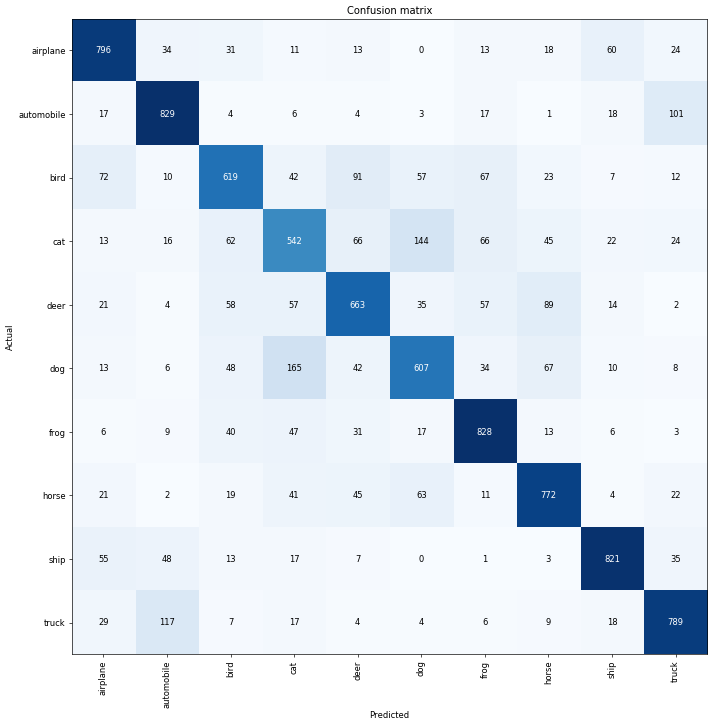

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)